In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

metadata_path = ('/content/drive/My Drive/instances_val2017/instances_val2017.json')
with open(metadata_path) as json_file:
    metadata = json.load(json_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load Dataset
dataset_path = '/content/drive/My Drive/val2017/'
image_files = os.listdir(dataset_path)
fimg_path = os.path.join(dataset_path, image_files[0])

In [4]:
img_path = '/content/drive/My Drive/val2017/000000581781.jpg'
image_BGR = cv2.imread(fimg_path)

In [5]:
# Convert to RGB
image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

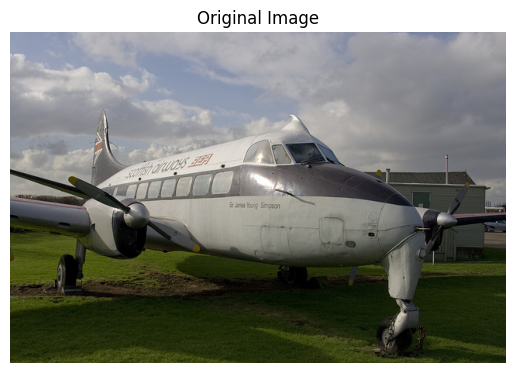

In [6]:
#Display Original Image
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [7]:
#Function to resize image
def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

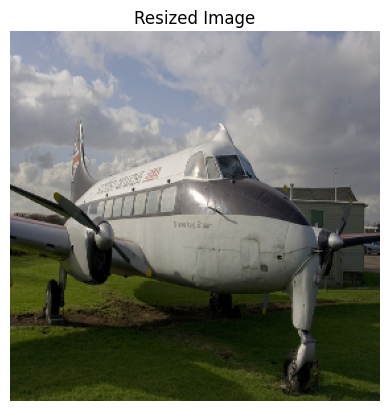

In [8]:
resized_image = resize_image(image,280,280)
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis("off")
plt.show()

In [9]:
#Function to increase brightness
def increase_brightness(image, value=30):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

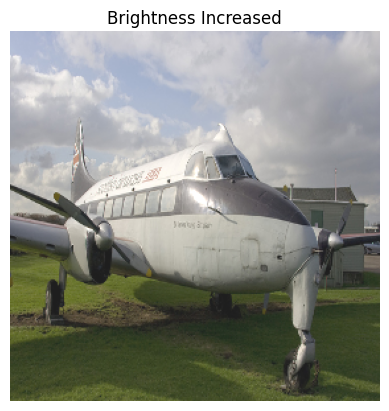

In [10]:
bright_image = increase_brightness(resized_image)
plt.imshow(bright_image)
plt.title('Brightness Increased')
plt.axis('off')
plt.show()

In [11]:
#Function to rotate image
def rotate_image(image, angle):
    if angle not in [90, 180, 270]:
        raise ValueError("Angle must be 90, 180, or 270 degrees.")
    if angle == 90:
        return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180:
        return cv2.rotate(image, cv2.ROTATE_180)
    elif angle == 270:
        return cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

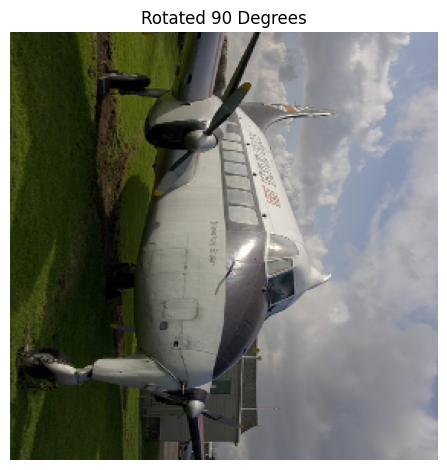

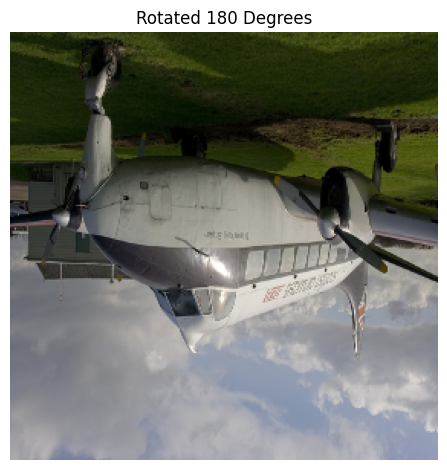

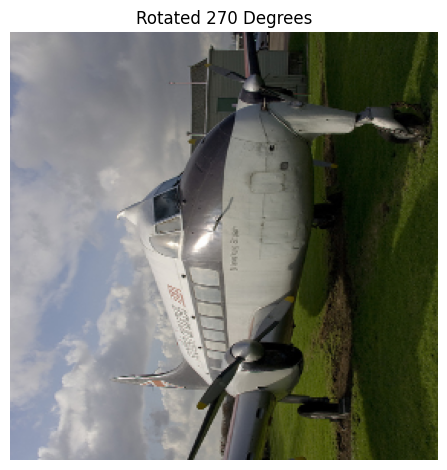

In [12]:
for angle in [90, 180, 270]:
    rotated_image = rotate_image(resized_image, angle)
    plt.imshow(rotated_image)
    plt.title(f'Rotated {angle} Degrees')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
#Function to greyscale image
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

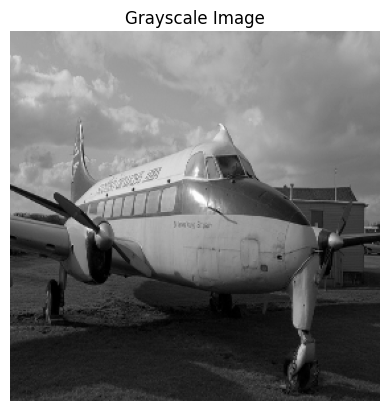

In [14]:
gray_image = convert_to_grayscale(resized_image)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [15]:
#Simple Thresholding
_, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

#Otsu's Thresholding
otsu_threshold, binary_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)

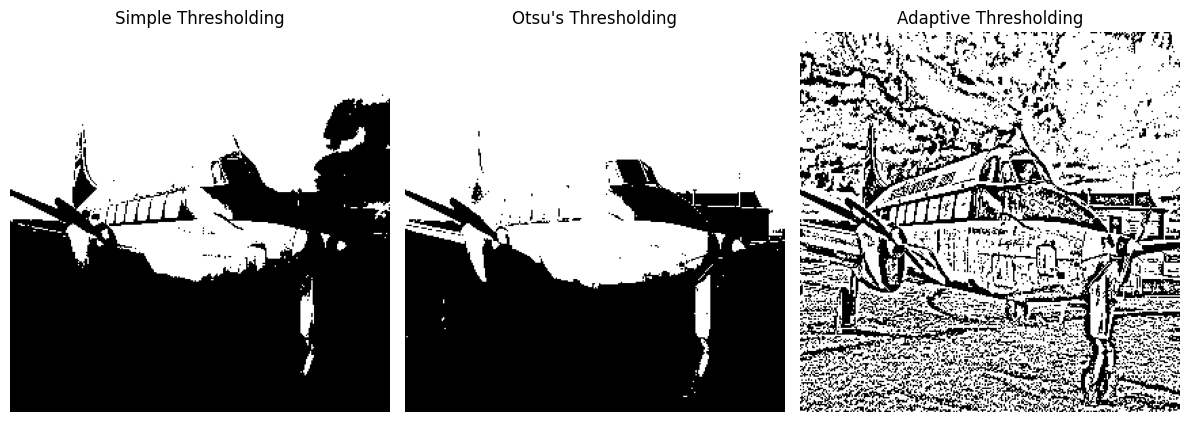

In [16]:
#Show Thresholding
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Simple Thresholding')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
#Function to thresholding image
def convert_to_thresholding(image):
    return  cv2.threshold(image,128,255,cv2.THRESH_BINARY)

In [18]:
#Function to flip image
def flip_image(image, flip_code):
    return cv2.flip(image, flip_code)

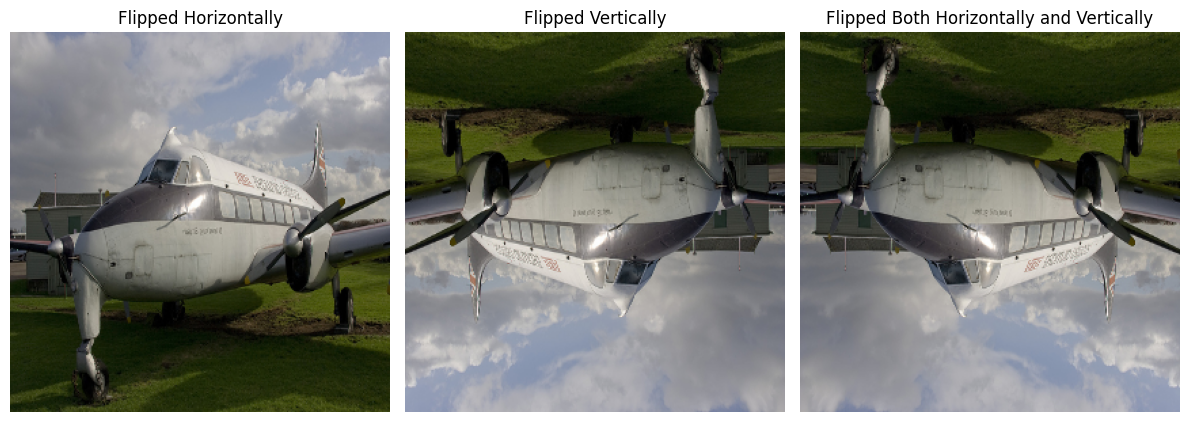

In [19]:
plt.figure(figsize=(12,8))
flipped_hr = flip_image(resized_image, 1)
plt.subplot(1, 3, 1)
plt.imshow(flipped_hr)
plt.title('Flipped Horizontally')
plt.axis('off')

plt.subplot(1, 3, 2)
flipped_vr = flip_image(resized_image, 0)
plt.imshow(flipped_vr)
plt.title('Flipped Vertically')
plt.axis('off')

plt.subplot(1, 3, 3)
flipped_both = flip_image(resized_image, -1)
plt.imshow(flipped_both)
plt.title('Flipped Both Horizontally and Vertically')
plt.axis('off')

plt.tight_layout()
plt.show()